In [1]:
import pandas as pd
import numpy as np
import random as rnd


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pd.read_csv('/home/ubuntu/Desktop/train.csv')
test = pd.read_csv('/home/ubuntu/Desktop/test.csv')
combine = [train, test]

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sagesser, Mlle. Emma",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
# Continous: Age, Fare. Discrete: SibSp, Parch

In [8]:
# Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.
# Name feature may contain errors or typos as there are several ways used to describe
# a name including titles, round brackets, and quotes used for alternative or short names.

In [9]:
# Names are unique across the train (count=unique=891)
# Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
# Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
# Embarked takes three possible values. S port used by most passengers (top=S)
# Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [10]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
def child(passenger):
    age,sex = passenger
    if age<16:
        return 'child'
    else:
        return sex
train['person'] = train[['Age', 'Sex']].apply(child,axis=1)
test['person'] = test[['Age','Sex']].apply(child,axis=1)

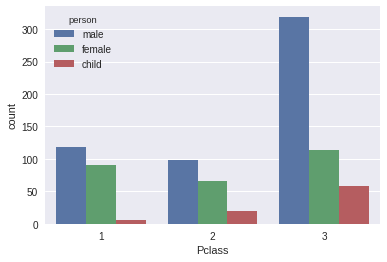

In [14]:
sns.countplot(train['Pclass'],hue=train['person'])

In [15]:
persons = train['person'].value_counts()
persons

male      537
female    271
child      83
Name: person, dtype: int64

In [16]:
p = test['person'].value_counts()
p

male      247
female    139
child      32
Name: person, dtype: int64

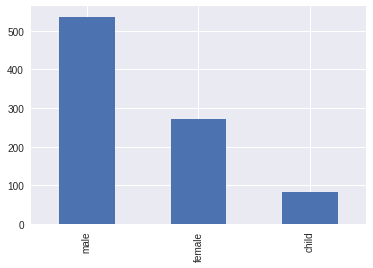

In [17]:
persons.plot.bar()

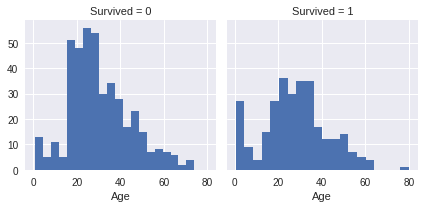

In [18]:
age_survived = sns.FacetGrid(train,col='Survived')
age_survived.map(plt.hist,'Age', bins=20)

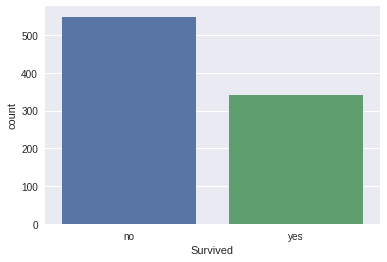

In [19]:
train["Survived"] = train.Survived.map({0: "no", 1: "yes"})
sns.countplot('Survived',data=train)

In [20]:
train['Survived'].value_counts(normalize=True) * 100

no     61.616162
yes    38.383838
Name: Survived, dtype: float64

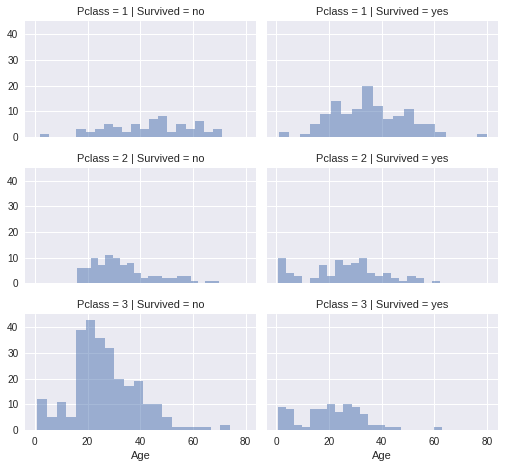

In [21]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

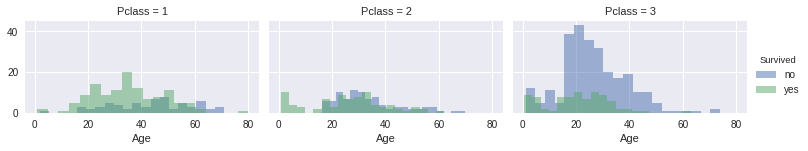

In [22]:
grid = sns.FacetGrid(train, col='Pclass', hue='Survived', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

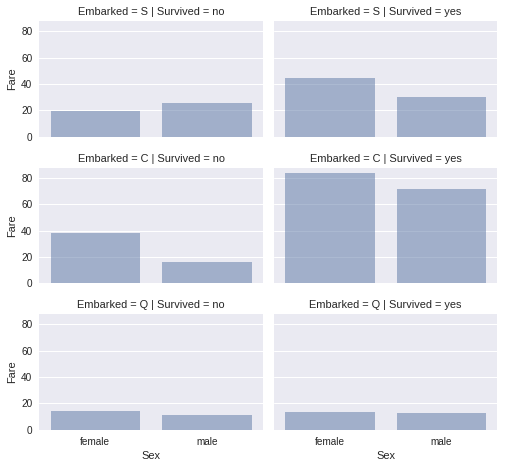

In [23]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [24]:
train['Age'] = train['Age'].replace('NaN',train.Age.mean())
test['Age'] = test['Age'].replace('NaN',test.Age.mean())

In [25]:
train["Age"] = train['Age'].astype(int)
test["Age"] = test['Age'].astype(int)

In [26]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]


In [27]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,person
0,892,3,"Kelly, Mr. James",male,34,0,0,7.8292,Q,male
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,7.0000,S,female
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,9.6875,Q,male
3,895,3,"Wirz, Mr. Albert",male,27,0,0,8.6625,S,male
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,12.2875,S,female


In [28]:
train['person'] = train['person'].map( {'child':0,'female': 1, 'male': 2} ).astype(int)
test['person'] = test['person'].map( {'child':0,'female': 1, 'male': 2} ).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,person
0,1,no,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,2
1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,1
2,3,yes,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,1
3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,1
4,5,no,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,2


In [29]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [30]:
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [31]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [32]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [33]:
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [34]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train['Title'] = train['Title'].map(title_mapping)
train['Title'] = train['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,person,Title
0,1,no,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,2,1
1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,1,3
2,3,yes,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,1,2
3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,1,3
4,5,no,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,2,1


In [35]:
title_mappings = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
test['Title'] = test['Title'].map(title_mappings)
test['Title'] = test['Title'].fillna(0)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,person,Title
0,892,3,"Kelly, Mr. James",male,34,0,0,7.8292,Q,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,7.0000,S,1,3
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,9.6875,Q,2,1
3,895,3,"Wirz, Mr. Albert",male,27,0,0,8.6625,S,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,12.2875,S,1,3


In [36]:
train[['Title', 'Survived']].groupby(train['Title'], as_index=False).mean()

,Title
0,1
1,2
2,3
3,4
4,5


In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,person,Title
0,1,no,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,2,1
1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,1,3
2,3,yes,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,1,2
3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,1,3
4,5,no,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,2,1


In [38]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]

In [39]:
train.shape, test.shape

((891, 10), (418, 10))

In [40]:
train = train.drop(['Sex'],axis=1)

In [41]:
train.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,person,Title
0,no,3,22,1,0,7.2500,S,2,1
1,yes,1,38,1,0,71.2833,C,1,3
2,yes,3,26,0,0,7.9250,S,1,2
3,yes,1,35,1,0,53.1000,S,1,3
4,no,3,35,0,0,8.0500,S,2,1


In [42]:
train['Survived'] = train['Survived'].map( {'no':0,'yes': 1} ).astype(int)

In [43]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,person,Title
0,0,3,22,1,0,7.2500,S,2,1
1,1,1,38,1,0,71.2833,C,1,3
2,1,3,26,0,0,7.9250,S,1,2
3,1,1,35,1,0,53.1000,S,1,3
4,0,3,35,0,0,8.0500,S,2,1


In [44]:
test = test.drop(['Sex'], axis=1)

In [45]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,person,Title
0,892,3,34,0,0,7.8292,Q,2,1
1,893,3,47,1,0,7.0000,S,1,3
2,894,2,62,0,0,9.6875,Q,2,1
3,895,3,27,0,0,8.6625,S,2,1
4,896,3,22,1,1,12.2875,S,1,3


In [46]:
train["Alone"] = train.Parch + train.SibSp
train["Alone"].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [47]:
test["Alone"] = test.Parch + test.SibSp
test["Alone"].head()

0    0
1    1
2    0
3    0
4    2
Name: Alone, dtype: int64

In [48]:
train["Alone"].loc[train["Alone"] != 0] = 'With Family'
train["Alone"].loc[train["Alone"] == 0] = 'Alone'

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [49]:
test["Alone"].loc[test["Alone"] != 0] = 'With Family'
test["Alone"].loc[test["Alone"] == 0] = 'Alone'

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [50]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port

'S'

In [51]:
train['Embarked'] = train['Embarked'].fillna(freq_port)
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [52]:
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [53]:
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [54]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,person,Title,Alone
0,0,3,22,1,0,7.2500,0,2,1,With Family
1,1,1,38,1,0,71.2833,1,1,3,With Family
2,1,3,26,0,0,7.9250,0,1,2,Alone
3,1,1,35,1,0,53.1000,0,1,3,With Family
4,0,3,35,0,0,8.0500,0,2,1,Alone


In [55]:
train['Alone'] = train['Alone'].map( {"Alone":0,'With Family':1}).astype(int)

In [56]:
test['Alone'] = test['Alone'].map( {"Alone":0,'With Family':1}).astype(int)

In [57]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,person,Title,Alone
0,0,3,22,1,0,7.2500,0,2,1,1
1,1,1,38,1,0,71.2833,1,1,3,1
2,1,3,26,0,0,7.9250,0,1,2,0
3,1,1,35,1,0,53.1000,0,1,3,1
4,0,3,35,0,0,8.0500,0,2,1,0


In [58]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,person,Title,Alone
0,892,3,34,0,0,7.8292,2,2,1,0
1,893,3,47,1,0,7.0000,0,1,3,1
2,894,2,62,0,0,9.6875,2,2,1,0
3,895,3,27,0,0,8.6625,0,2,1,0
4,896,3,22,1,1,12.2875,0,1,3,1


In [59]:
# train['AgeBand'] = pd.cut(train['Age'], 5)
# train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [60]:
# test.loc[ test['Age'] <= 16, 'Age'] = 0
# test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
# test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
# test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
# test.loc[ test['Age'] > 64, 'Age']

In [61]:
# test.loc[ test['Age'] <= 16, 'Age'] = 0
# test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
# test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
# test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
# test.loc[ test['Age'] > 64, 'Age']

In [62]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,person,Title,Alone
0,892,3,34,0,0,7.8292,2,2,1,0
1,893,3,47,1,0,7.0000,0,1,3,1
2,894,2,62,0,0,9.6875,2,2,1,0
3,895,3,27,0,0,8.6625,0,2,1,0
4,896,3,22,1,1,12.2875,0,1,3,1


In [63]:
test = test.drop(['Parch', "SibSp"],axis=1)

In [64]:
train = train.drop(['Parch', "SibSp"],axis=1)

In [65]:
train.shape,test.shape

((891, 8), (418, 8))

In [66]:
train["Fare"] = train.Fare.astype(int)

In [67]:
train.head()

,Survived,Pclass,Age,Fare,Embarked,person,Title,Alone
0,0,3,22,7,0,2,1,1
1,1,1,38,71,1,1,3,1
2,1,3,26,7,0,1,2,0
3,1,1,35,53,0,1,3,1
4,0,3,35,8,0,2,1,0


In [68]:
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3
train['Fare'] = train['Fare'].astype(int)

In [69]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

In [70]:
test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3
test['Fare'] = test['Fare'].astype(int)

In [71]:
test.head()

,PassengerId,Pclass,Age,Fare,Embarked,person,Title,Alone
0,892,3,34,0,2,2,1,0
1,893,3,47,0,0,1,3,1
2,894,2,62,1,2,2,1,0
3,895,3,27,1,0,2,1,0
4,896,3,22,1,0,1,3,1


In [72]:
train.head()

,Survived,Pclass,Age,Fare,Embarked,person,Title,Alone
0,0,3,22,0,0,2,1,1
1,1,1,38,3,1,1,3,1
2,1,3,26,0,0,1,2,0
3,1,1,35,3,0,1,3,1
4,0,3,35,1,0,2,1,0


In [73]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [74]:

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.239999999999995

In [75]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,Embarked,0.388233
5,Title,0.336175
1,Age,0.004970
2,Fare,-0.023923
6,Alone,-0.263937
0,Pclass,-0.956840
4,person,-1.477104


In [76]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

86.760000000000005

In [77]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

88.549999999999997

In [78]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

74.299999999999997

In [79]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

75.079999999999998

In [80]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

61.280000000000001

In [81]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

71.719999999999999

In [82]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

93.939999999999998

In [83]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

93.939999999999998

In [84]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,93.94
8,Decision Tree,93.94
1,KNN,88.55
0,Support Vector Machines,86.76
2,Logistic Regression,79.24
5,Perceptron,75.08
4,Naive Bayes,74.30
6,Stochastic Gradient Decent,71.72
7,Linear SVC,61.28


In [85]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_pred})

In [86]:
submission.to_csv('/home/ubuntu/Desktop/titanic.csv', index=False)